<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/xAI-gender-based-mental-health-analysis/blob/main/age-mental-eda-preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA)**

In [76]:
import os
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

%matplotlib inline
warnings.filterwarnings('ignore')

In [77]:
plt.rcParams.update({
    "figure.dpi": 150,
    "savefig.dpi": 600,
    "font.size": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.titlesize": 12,
    "pdf.fonttype": 42,
    "ps.fonttype": 42
})
sns.set_style("white")
sns.set_context("paper", font_scale=1.2)
colors = sns.color_palette("colorblind")

export_png = True

out_dir = "figures"
os.makedirs(out_dir, exist_ok=True)

def safe_name(s: str) -> str:
    return "".join(c if (c.isalnum() or c in "-_") else "_" for c in s).strip("_")

### **Load dataset**

In [78]:
df = pd.read_csv("numeric_dataset.csv")

### **Basic Inspection**

In [79]:
df.shape

(3439, 31)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439 entries, 0 to 3438
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    3426 non-null   float64
 1   Gender                                 3405 non-null   float64
 2   Country_of_residence                   3437 non-null   object 
 3   Country_of_work                        3437 non-null   object 
 4   Self_employed                          3439 non-null   int64  
 5   Company_size                           2851 non-null   float64
 6   Mh_benefits                            2851 non-null   float64
 7   Employer_discussed_mh                  2851 non-null   float64
 8   Mh_resources                           2851 non-null   float64
 9   Anonymity_protected                    2851 non-null   float64
 10  Ease_medical_leave                     2851 non-null   float64
 11  Comf

In [81]:
print(df["Gender"].value_counts())

Gender
1.0    2369
0.0     937
2.0      99
Name: count, dtype: int64


In [82]:
print(df["Gender"].value_counts(normalize=True) * 100)

Gender
1.0    69.574156
0.0    27.518355
2.0     2.907489
Name: proportion, dtype: float64


- 0 = Female
- 1 = Male
- 2 = Other

### **Drop Other**

In [83]:
df_cleaned = df[df['Gender'] != 2.0].copy()
df_cleaned = df_cleaned.reset_index(drop=True)

In [84]:
print("New Gender Counts:")
print(df_cleaned["Gender"].value_counts())

print("\nNew Gender Percentages:")
print(df_cleaned["Gender"].value_counts(normalize=True) * 100)

print(f"\nFinal dataset shape: {df_cleaned.shape}")

New Gender Counts:
Gender
1.0    2369
0.0     937
Name: count, dtype: int64

New Gender Percentages:
Gender
1.0    71.657592
0.0    28.342408
Name: proportion, dtype: float64

Final dataset shape: (3340, 31)


### **Gender Distribution**

In [85]:
classes = df_cleaned['Gender'].value_counts()
print(classes)

Gender
1.0    2369
0.0     937
Name: count, dtype: int64


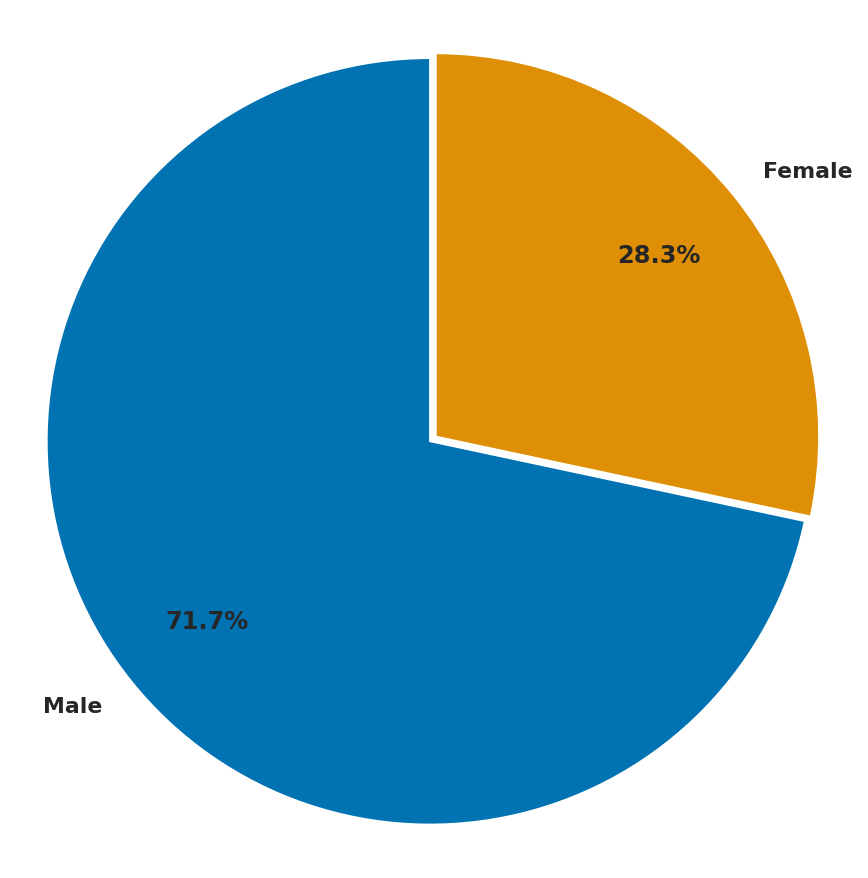

In [86]:
labels = ['Male' if x == 1 else 'Female' for x in classes.index]

fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    classes,
    labels=labels,
    startangle=90,
    explode=[0.01, 0.01],
    colors=colors,
    autopct='%1.1f%%',
    pctdistance=0.75,
    labeldistance=1.1,
    textprops={'fontweight': 'bold'}
)

ax.axis('equal')
fig.tight_layout()

base_name = "gender_distribution"
pdf_path = os.path.join(out_dir, f"{base_name}.pdf")
fig.savefig(pdf_path, bbox_inches="tight", pad_inches=0.02)

plt.show()
plt.close(fig)

### **Mental Health Prevalence by Gender**

Prevalence of Diagnosed Mental Health Disorders by Gender


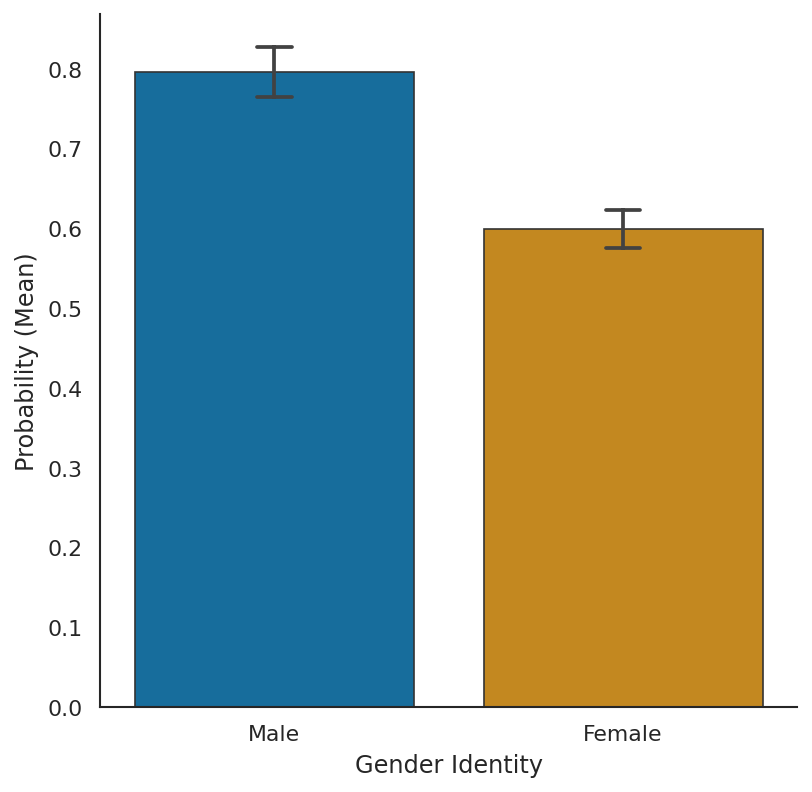

In [87]:
fig, ax = plt.subplots(figsize=(6, 6))

ax = sns.barplot(
    data=df_cleaned,
    x='Gender',
    y='Diagnosed_mh',
    palette=colors,
    edgecolor=".2",
    capsize=.1
)

print('Prevalence of Diagnosed Mental Health Disorders by Gender')

plt.xlabel('Gender Identity')
plt.ylabel('Probability (Mean)')
plt.xticks([0, 1], ['Male', 'Female'])

sns.despine()

base_name = "mental_health_prevalence_by_gender"
pdf_path = os.path.join(out_dir, f"{base_name}.pdf")
fig.savefig(pdf_path, bbox_inches="tight", pad_inches=0.02)

plt.show()
plt.close(fig)

### **Mental Health Distribution**

In [88]:
print(df_cleaned["Diagnosed_mh"].value_counts())

Diagnosed_mh
1.0    1429
0.0     734
Name: count, dtype: int64


In [89]:
mh_counts = df_cleaned["Diagnosed_mh"].dropna().value_counts()
mh_labels = ['Diagnosed' if x == 1 else 'Not Diagnosed' for x in mh_counts.index]

Mental Health Diagnosis Distribution


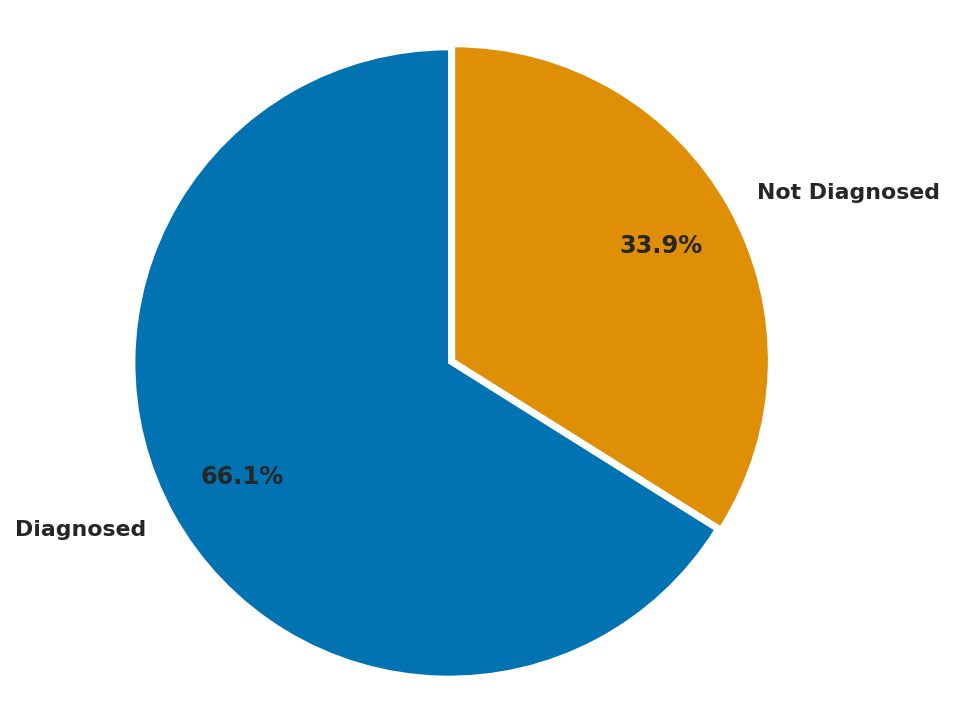

In [90]:
fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    mh_counts,
    labels=mh_labels,
    startangle=90,
    explode=[0.01, 0.01],
    colors=colors,
    autopct='%1.1f%%',
    pctdistance=0.75,
    labeldistance=1.1,
    textprops={'fontweight': 'bold'}
)

ax.axis('equal')
print('Mental Health Diagnosis Distribution')

base_name = "mh_diagnosis_distribution"
pdf_path = os.path.join(out_dir, f"{base_name}.pdf")
fig.savefig(pdf_path, bbox_inches="tight", pad_inches=0.02)


plt.show()
plt.close(fig)

### **Mental Health Diagnosis by Gender**

Mental Health Diagnosis Rates by Gender


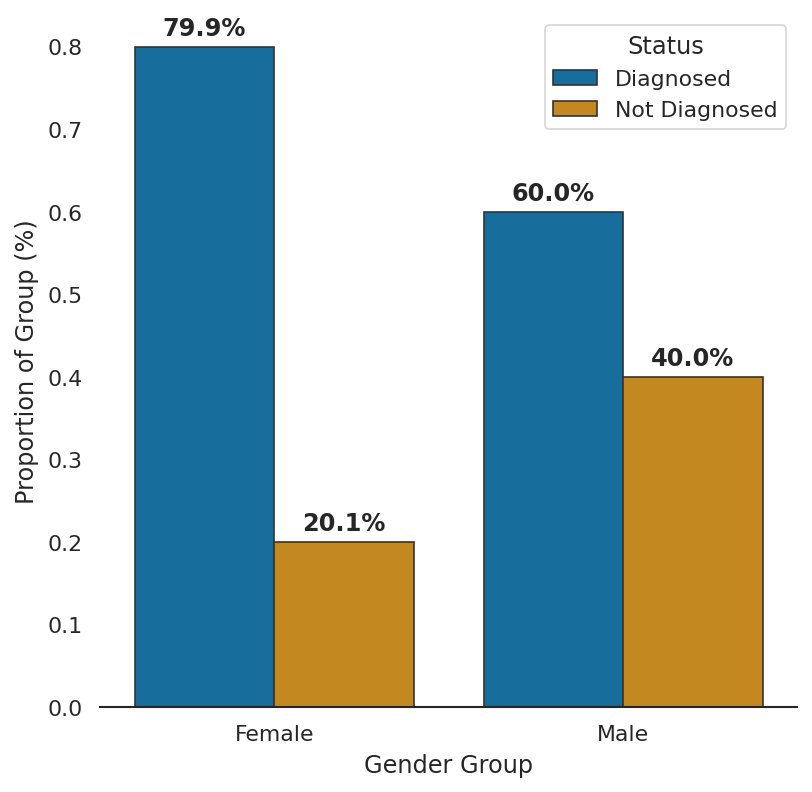

In [101]:
df_plot = df_cleaned.dropna(subset=['Diagnosed_mh']).copy()

prop_df = (df_plot.groupby("Gender")["Diagnosed_mh"]
           .value_counts(normalize=True)
           .rename("percentage")
           .reset_index())

prop_df['Gender'] = prop_df['Gender'].map({1.0: 'Male', 0.0: 'Female'})
prop_df['Diagnosed_mh'] = prop_df['Diagnosed_mh'].map({1.0: 'Diagnosed', 0.0: 'Not Diagnosed'})

fig, ax = plt.subplots(figsize=(6, 6))

ax = sns.barplot(
    data=prop_df,
    x='Gender',
    y='percentage',
    hue='Diagnosed_mh',
    palette=colors,
    edgecolor=".2"
)

for p in ax.patches:
    height = p.get_height()
    if height > 0.001: # Only label if the bar actually exists
        ax.annotate(f'{height*100:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontweight='bold')


print('Mental Health Diagnosis Rates by Gender')
plt.xlabel('Gender Group')
plt.ylabel('Proportion of Group (%)')
plt.legend(title='Status', loc='upper right')

sns.despine(left=True)

base_name = "mh_distribution_by_gender"
pdf_path = os.path.join(out_dir, f"{base_name}.pdf")
fig.savefig(pdf_path, bbox_inches="tight", pad_inches=0.02)


plt.show()
plt.close(fig)

In [92]:
df_plot = df_cleaned.dropna(subset=['Diagnosed_mh']).copy()
raw_counts = pd.crosstab(df_plot['Gender'], df_plot['Diagnosed_mh'])

raw_counts.index = ['Female', 'Male']
raw_counts.columns = ['Not Diagnosed', 'Diagnosed']

raw_counts_with_totals = raw_counts.copy()
raw_counts_with_totals['Total'] = raw_counts_with_totals.sum(axis=1)
raw_counts_with_totals.loc['Total'] = raw_counts_with_totals.sum()

print("--- Raw Counts: Mental Health Diagnosis by Gender ---")
print(raw_counts_with_totals)

--- Raw Counts: Mental Health Diagnosis by Gender ---
        Not Diagnosed  Diagnosed  Total
Female            131        511    642
Male              602        903   1505
Total             733       1414   2147


### **Data Imputation**

In [93]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    3328 non-null   float64
 1   Gender                                 3306 non-null   float64
 2   Country_of_residence                   3338 non-null   object 
 3   Country_of_work                        3338 non-null   object 
 4   Self_employed                          3340 non-null   int64  
 5   Company_size                           2765 non-null   float64
 6   Mh_benefits                            2765 non-null   float64
 7   Employer_discussed_mh                  2765 non-null   float64
 8   Mh_resources                           2765 non-null   float64
 9   Anonymity_protected                    2765 non-null   float64
 10  Ease_medical_leave                     2765 non-null   float64
 11  Comf

In [94]:
df_cleaned = df_cleaned.drop(columns=['Country_of_work', 'Country_of_residence', 'Country_of_residence_encoded','Country_of_work_encoded'])

In [95]:
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
columns_to_impute = [col for col in df_cleaned.columns if col != 'Diagnosed_mh']
df_cleaned[columns_to_impute] = mice_imputer.fit_transform(df_cleaned[columns_to_impute])

In [96]:
columns_to_convert = [col for col in df_cleaned.columns if col != 'Diagnosed_mh']
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].astype('int64')

In [97]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    3340 non-null   int64  
 1   Gender                                 3340 non-null   int64  
 2   Self_employed                          3340 non-null   int64  
 3   Company_size                           3340 non-null   int64  
 4   Mh_benefits                            3340 non-null   int64  
 5   Employer_discussed_mh                  3340 non-null   int64  
 6   Mh_resources                           3340 non-null   int64  
 7   Anonymity_protected                    3340 non-null   int64  
 8   Ease_medical_leave                     3340 non-null   int64  
 9   Comfort_coworkers                      3340 non-null   int64  
 10  Comfort_supervisor                     3340 non-null   int64  
 11  Empl

### **Columns to Drop for Leakage Prevention**



*To ensure the predictive integrity of our model and avoid data leakage, features representing clinical outcomes or post-diagnostic behaviors (e.g., 'Sought Treatment', 'Past Mental Health Disorder') were excluded. This forces the model to rely on workplace environmental factors and demographic indicators, providing more actionable insights for organizational policy.*

In [98]:
leakage_columns = [
    'Sought_treatment',
    'Past_mh_disorder',
    'Current_mh_disorder',
    'Interference_work_effective_treatment',
    'Interference_work_no_treatment'
]

df_cleaned = df_cleaned.drop(columns=leakage_columns)

df_final = df_cleaned.dropna(subset=['Diagnosed_mh']).copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2163 entries, 0 to 3339
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                2163 non-null   int64  
 1   Gender                             2163 non-null   int64  
 2   Self_employed                      2163 non-null   int64  
 3   Company_size                       2163 non-null   int64  
 4   Mh_benefits                        2163 non-null   int64  
 5   Employer_discussed_mh              2163 non-null   int64  
 6   Mh_resources                       2163 non-null   int64  
 7   Anonymity_protected                2163 non-null   int64  
 8   Ease_medical_leave                 2163 non-null   int64  
 9   Comfort_coworkers                  2163 non-null   int64  
 10  Comfort_supervisor                 2163 non-null   int64  
 11  Employer_importance_mental         2163 non-null   int64  
 1

In [100]:
df_final.to_csv('final_dataset.csv', index=False)
files.download('final_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>